# Unequal Number of Modes

> Find the S-matrix of a structure for which each slice has a different number of modes (contributed by @jan-david-black)

In [1]:
import meow as mw
import numpy as np

In [2]:
def create_structures(length=10.0):
    oxide = mw.Structure(
        material=mw.silicon_oxide,
        geometry=mw.Prism(
            poly=np.array([(0, -2.1), (10, -2.1), (10, 2.1), (0, 2.1)]),
            h_min=-3,
            h_max=0,
            axis="y",
        ),
    )

    poly = np.array([(0, -0.45 / 2), (10, -0.5 / 2), (10, 0.5 / 2), (0, 0.45 / 2)])

    core = mw.Structure(
        material=mw.silicon,
        geometry=mw.Prism(
            poly=poly,
            h_min=0,
            h_max=0.22,
            axis="y",
        ),
    )

    structures = [oxide, core]
    return structures

In [3]:
mw.visualize(create_structures())

In [4]:
def create_cells(length=10.0, num_cells=2):
    structures = create_structures(length=length)
    cells = mw.create_cells(
        structures=structures,
        mesh=mw.Mesh2D(
            x=np.linspace(-2, 2, 101),
            y=np.linspace(-2, 2, 101),
            # specify possible conformal mesh specifications here:
            # bend_radius=2.0,
            # bend_axis=1,
        ),
        Ls=np.array([length / num_cells for _ in range(num_cells)]),
    )
    return cells

In [5]:
cells = create_cells(10, 2)
env = mw.Environment(wl=1.55, T=25.0)
css = [mw.CrossSection.from_cell(cell=cell, env=env) for cell in cells]

## Equal number of modes

In [6]:
modes = [mw.compute_modes(cs, num_modes=4) for cs in css]

In [7]:
for ms in modes:
    print(len(ms))

4
4


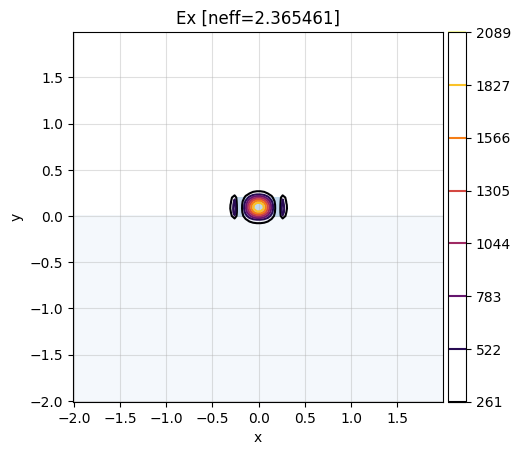

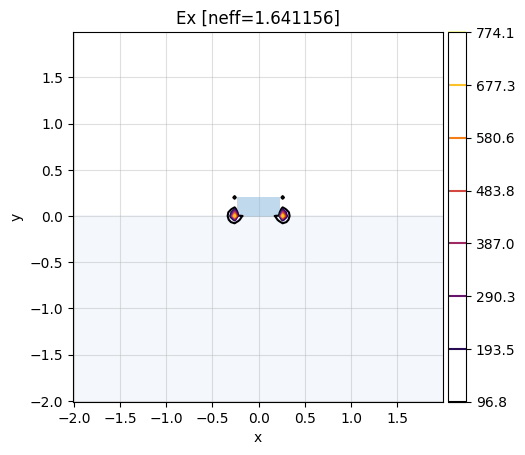

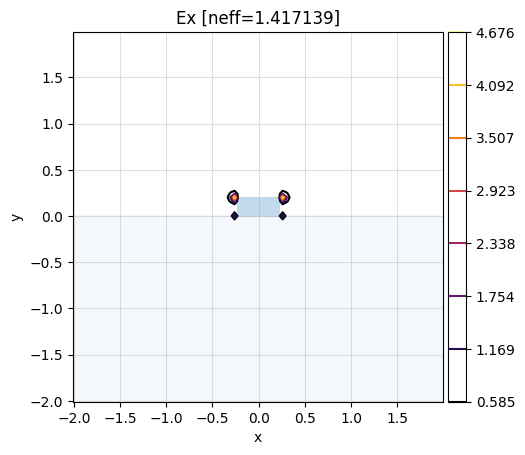

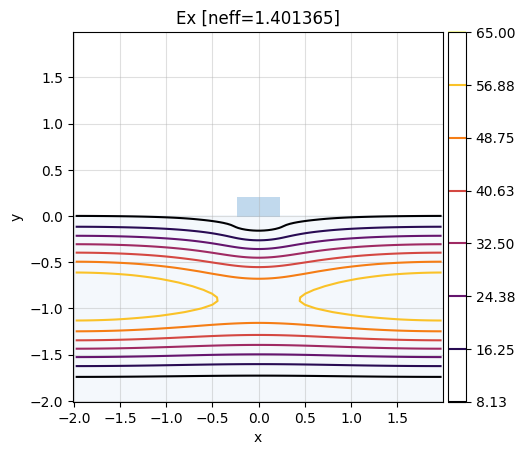

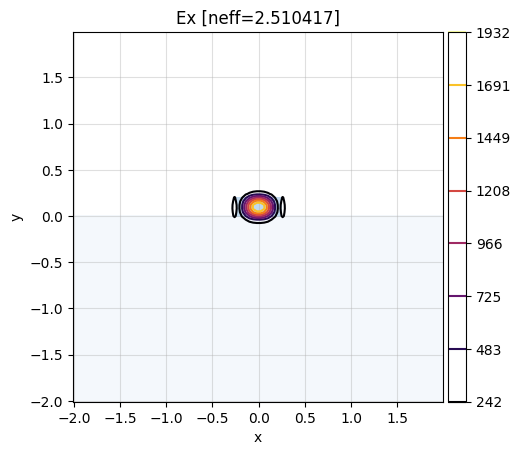

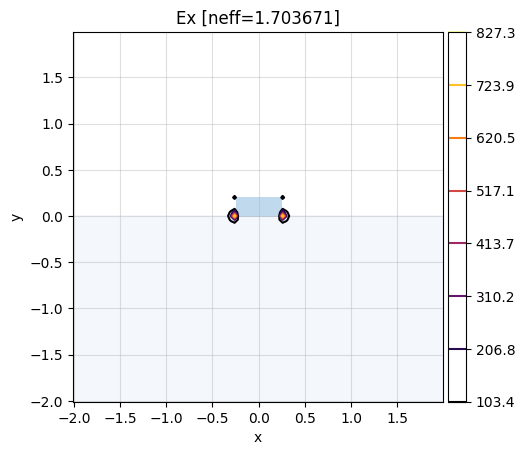

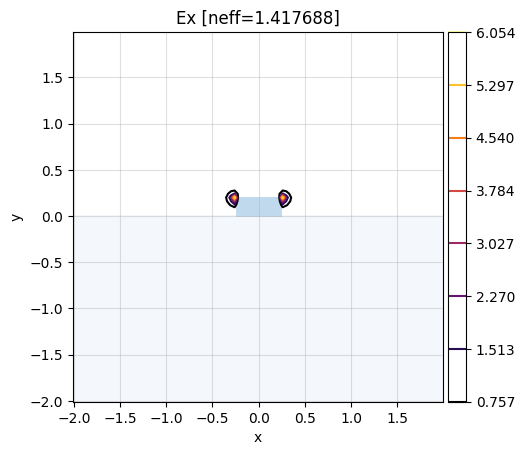

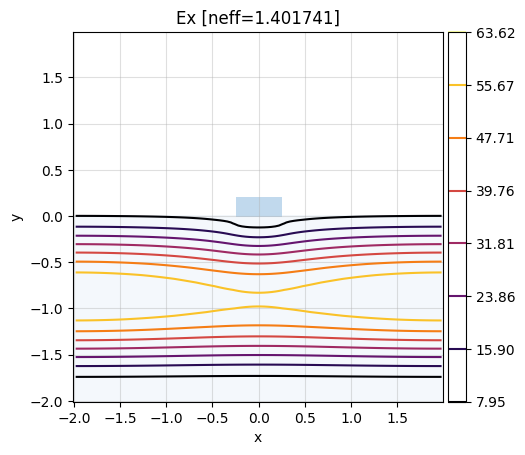

In [8]:
for ms in modes:
    for m in ms:
        mw.visualize(m)

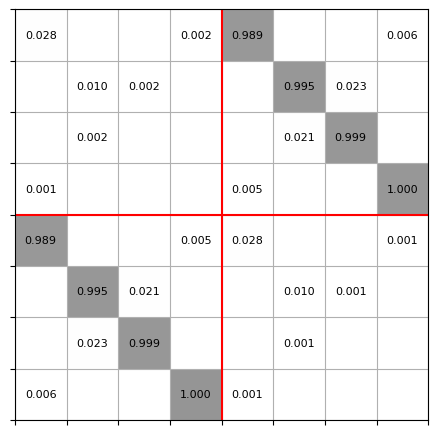

In [9]:
S, pm = mw.compute_s_matrix(modes, cells)
mw.visualize((abs(S), pm))

## Unequal number of modes

In [10]:
modes[0] = modes[0][:2]
modes[-1] = modes[-1][:3]

In [11]:
for ms in modes:
    print(len(ms))

2
3


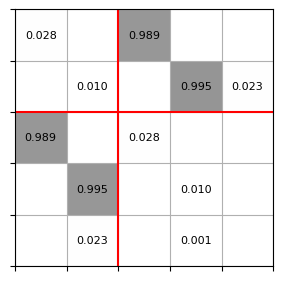

In [12]:
S, pm = mw.compute_s_matrix(modes, cells)
mw.visualize((abs(S), pm))